# Problem rezystorów 2

### Naszym celem jest oszacowanie, jaki największy prąd może przez podany układ:
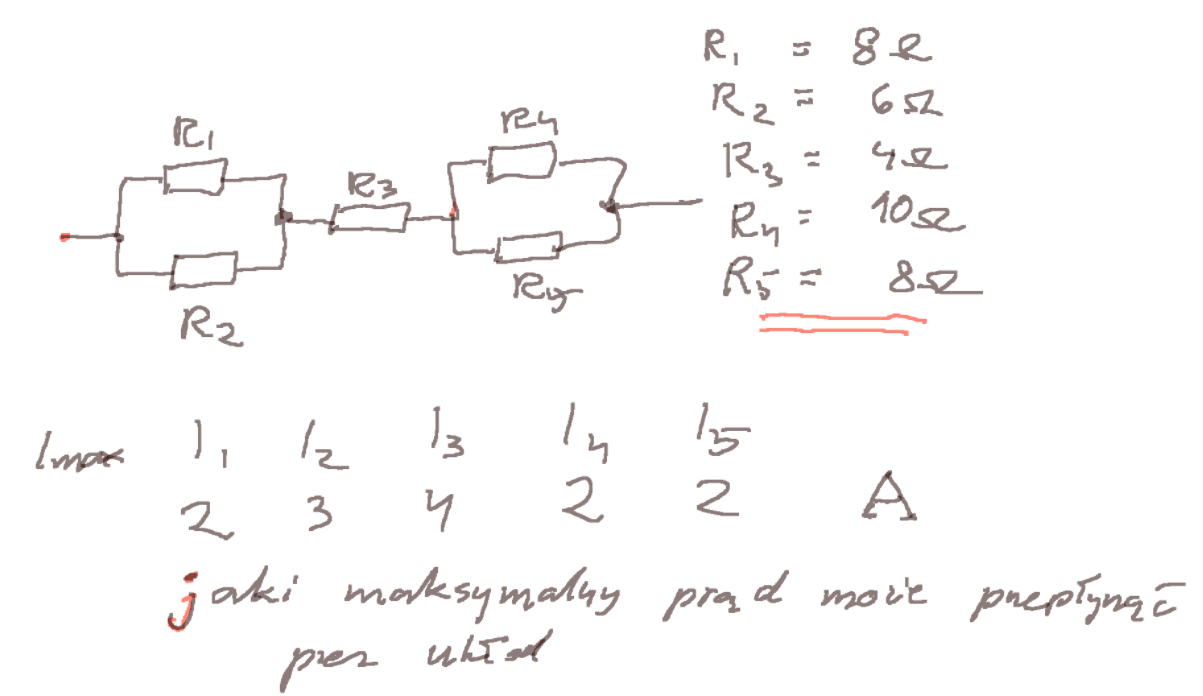

In [1]:
from pulp import *

In [31]:
prob = LpProblem("Max prad na rezystorach",LpMaximize)
I1=LpVariable("I1",0)
I2=LpVariable("I2",0)
I3=LpVariable("I3",0)
I4=LpVariable("I4",0)
I5=LpVariable("I5",0)

R = [8,6,4,10,8]
prob += I4+I5
prob += I1+I2==I3
prob += I3==I4+I5
prob += I1*R[0] == I2*R[1] 
prob += I4*R[3] == I5*R[4]

prob += I1 >= 0 
prob += I1 <= 2
prob += I2 >= 0
prob += I2 <= 3
prob += I3 >= 0
prob += I3 <= 4
prob += I4 >= 0
prob += I4 <= 2
prob += I5 >= 0
prob += I5 <= 2

prob.writeLP("prad_rezystory.lp")
prob.solve()
a=0
napiecia={}
prady={}
for x in prob.variables():
    prady[x.name] = x.varValue
    napiecia["U"+str(a+1)] = R[a]*x.varValue
    a =a + 1
 
 
print("Status:", LpStatus[prob.status])
print("Prąd max: {}A".format(value(prob.objective)))
print("Prądy kolejno: {}".format(prady))
print("Napiecia: {}".format(napiecia))


Status: Optimal
Prąd max: 3.6A
Prądy kolejno: {'I1': 1.5428571, 'I2': 2.0571429, 'I3': 3.6, 'I4': 1.6, 'I5': 2.0}
Napiecia: {'U1': 12.3428568, 'U2': 12.3428574, 'U3': 14.4, 'U4': 16.0, 'U5': 16.0}
